In [19]:
import pandas as pd 

In [20]:
dados = pd.read_csv('vendas_supermercado.csv')
dados.head()

,cidade,tipo_cliente,genero,tipo_produto,preco,quantidade,taxa_5%,total,dia,hora,forma_pagamento,margem_lucro,renda_bruta,avaliacao
0,Yangon,Member,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira Digital,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,4.761905,3.8200,9.6
2,Yangon,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartão de Crédito,4.761905,16.2155,7.4
3,Yangon,Member,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira Digital,4.761905,23.2880,8.4
4,Yangon,Normal,Masculino,Esportes,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira Digital,4.761905,30.2085,5.3


# Sazonalidade

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
sazonalidade  = seasonal_decompose(dados.total, period= 3)
sazonalidade

In [23]:
import matplotlib.pyplot as plt

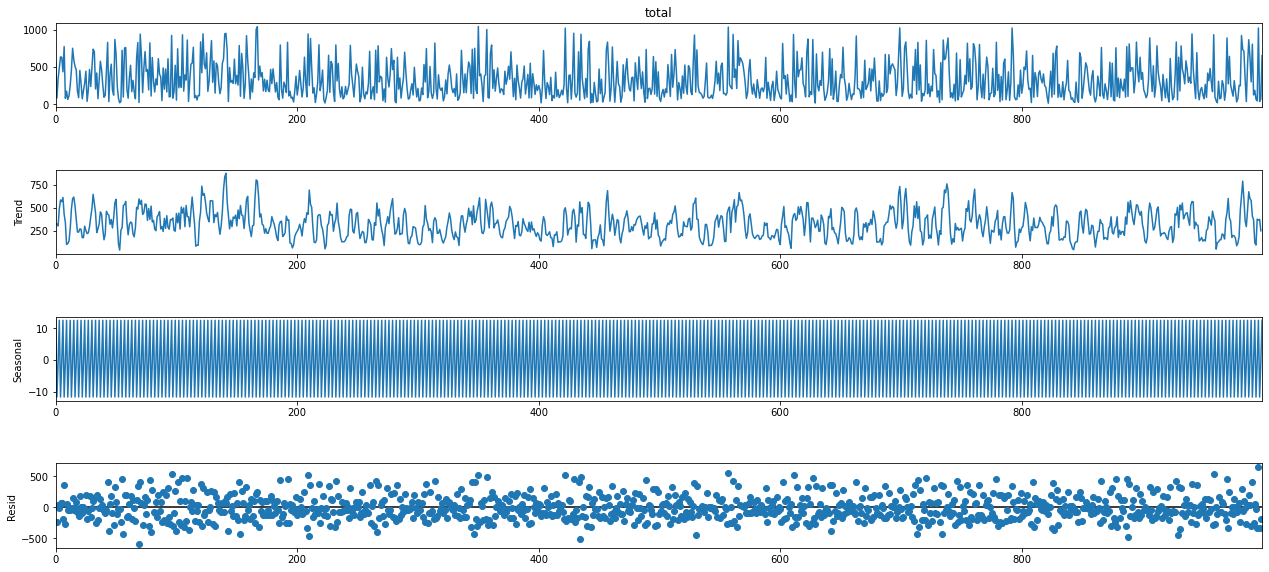

In [24]:
ax = sazonalidade.plot()
ax.figure.set_size_inches (20, 9)

# Diferenças estatistica dos gastos de membros e não membros

In [25]:
from scipy.stats import ranksums

In [26]:
membros = dados.query("tipo_cliente == 'Member'").total

In [31]:
nao_membros = dados.query("tipo_cliente == 'Normal'").total

In [28]:
ranksums(membros, nao_membros)

RanksumsResult(statistic=0.537267426420291, pvalue=0.5910829022492772)

In [29]:
print('O valor do p-value é de {}, portanto não existe diferença estatistica entre gastos de membros e não membros'.format(ranksums(membros, nao_membros).pvalue.round(2)))

O valor do p-value é de 0.59, portanto não existe diferença estatistica entre gastos de membros e não membros
